some_digit
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  86 131 225
 225 225   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  73 197 253 252 252 252 252   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   4  29  29 154 187 252 252 253
 252 252 233 145   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  29 252 253 252 252 252 252 253

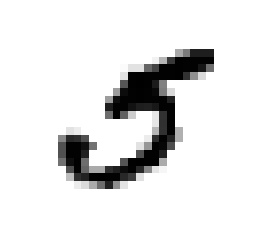

shuffle_indx [47464 34262 34941 ...,  6579 39417 51748]
len(shuffle_index) 60000
type(shuffle_index) <class 'numpy.ndarray'>
y_train_5
[False  True  True ..., False False False]
y_train
[ 7.  5.  5. ...,  1.  6.  8.]
[False]


In [148]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
print('some_digit')
print(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

#split the test set and train set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]


import numpy as np
#产生60000个随机数，范围在0-60000里边
shuffle_index = np.random.permutation(60000)
print('shuffle_indx',shuffle_index)
print('len(shuffle_index)',len(shuffle_index))
print('type(shuffle_index)',type(shuffle_index))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#y=5 classifier
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
print('y_train_5')
print(y_train_5)
print('y_train')
print(y_train)
y_test_5 = (y_test == 5)

#train it on the whole training set
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

#                                   TIP
#The SGDClassifier relies on randomness during training (hence the name
#“stochastic”). If you want reproducible results, you should set the random_state
#parameter.

print(sgd_clf.predict([some_digit]))







#                             IMPLEMENTING CROSS-VALIDATION
Occasionally you will need more control over the cross-validation process than what
cross_val_score() and similar functions provide. In these cases, you can implement
cross-validation yourself; it is actually fairly straightforward. The following code does
roughly the same thing as the preceding cross_val_score() code, and prints the same
:    result:
        
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    skfolds = StratifiedKFold(n_splits=3, random_state=42)
    for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495
The StratifiedKFold class performs stratified sampling (as explained in Chapter 2) to
produce folds that contain a representative ratio of each class. At each iteration the
code creates a clone of the classifier, trains that clone on the training folds, and makes
predictions on the test fold. Then it counts the number of correct predictions and
outputs the ratio of correct predictions.

In [90]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    print(len(y_pred))
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

20000
0.9437
20000
0.96615
20000
0.9655


# meaure the perf of the model
# using cross_validation to measure the accuracy
:    from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")



In [87]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(len(y_train_pred))


60000


# Confusing Matrix 

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[50183,  4396],
       [ 4986,   435]])

# Precision and Recall Score

In [136]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1307)
print(len(y_train_pred))
print(y_train_pred)
print(precision_score(y_train_5, y_train_pred))
recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)

60000
[False False False ..., False False False]
0.750684931507


0.80870688064932672

# F1 score is used to evluate both the precise and recall number. only when both of this 2 parm are high, the f1 will be high

In [69]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.084861490440889586

## Precision/Recall Tradeoff
To understand this tradeoff, let’s look at how the SGDClassifier makes its
classification decisions. For each instance, it computes a score based on a
decision function, and if that score is greater than a threshold, it assigns the
instance to the positive class, or else it assigns it to the negative class
:    
    Scikit-Learn does not let you set the threshold directly, but it does give you
access to the decision scores that it uses to make predictions. Instead of calling
the classifier’s predict() method, you can call its decision_function()
method, which returns a score for each instance, and then make predictions
based on those scores using any threshold you want:

In [73]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 69824
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ 69824.17858482]
[ True]


## Different threshold can have effect on both the precise and recall number, thus have impact on the model's performance. We need to have a way to calculate and determine a best value of threshold

In [78]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")
print(y_scores)

[-232333.22736864 -257267.03300946  -79427.83977965 ..., -650493.28875641
 -700957.56967324 -265825.70334555]


## 下面使用 precision_recall_curve() 函数来计算precision and recall for all possiblethresholds

In [79]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

## 将上面得到的数值化成曲线：

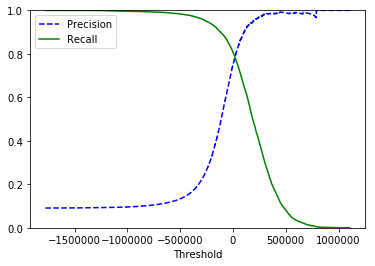

In [81]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## 或者，直接使用precision 和 recall的数值来画线

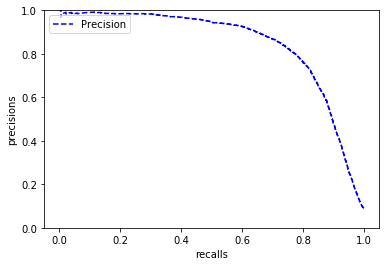

In [95]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--", label="Precision")
    plt.xlabel("recalls")
    plt.ylabel("precisions")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_vs_recall(precisions, recalls)
plt.show()

## 1. 首先选定了我的目标是精确度达到90%
>2. 在第一个曲线上面找到90%对应的THRESHOLD = 70000
>3. 将THRESHOLD = 70000带回到这里计算

In [120]:


y_train_pred_90 = (y_scores > 70000)
print(len(y_train_pred_90))
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)
print('y_train_pred_90 ',y_train_pred_90 )
print('precision_score(y_train_5, y_train_pred_90)', precision_score(y_train_5, y_train_pred_90))
print('recall_score(y_train_5, y_train_pred_90)',recall_score(y_train_5, y_train_pred_90))

60000
y_train_pred_90  [False False False ..., False False False]
precision_score(y_train_5, y_train_pred_90) 0.863901345291
recall_score(y_train_5, y_train_pred_90) 0.710754473344


# The ROC Curve

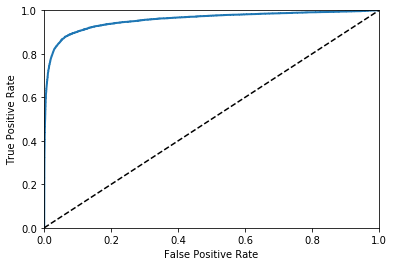

In [102]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
#from sklearn.metrics import precision_recall_curve
#precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

#画图
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()


# 比较randomforests 和当前的 SGDClassifier模型的优劣
     
>Let’s train a RandomForestClassifier and compare its ROC curve and ROC
AUC score to the SGDClassifier. First, you need to get scores for each
instance in the training set. But due to the way it works (see Chapter 7), the
RandomForestClassifier class does not have a decision_function()
method. Instead it has a predict_proba() method. Scikit-Learn classifiers
generally have one or the other. The predict_proba() method returns an
array containing a row per instance and a column per class, each containing the
probability that the given instance belongs to the given class (e.g., 70% chance
that the image represents a 5):

In [124]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")
print(y_probas_forest)


[[ 0.9  0.1]
 [ 1.   0. ]
 [ 0.9  0.1]
 ..., 
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]]


## But to plot a ROC curve, you need scores, not probabilities. A simple solutionis to use the positive class’s probability as the score:

In [117]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
#选择y_probas_forest结果里边的第一列
print(len(y_scores_forest))
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

60000


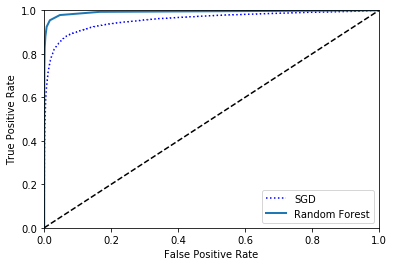

In [125]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [116]:
precisions_f, recalls_f, thresholds_f = precision_recall_curve(y_train_5,y_scores_forest)
print('precisions_f: ',len(precisions_f))
print('recalls_f: ',recalls_f)
print('thresholds_f: ',thresholds_f)

precisions_f:  12
recalls_f:  [ 1.          0.99317469  0.97841727  0.95443645  0.9243682   0.88009592
  0.82604685  0.74322081  0.6338314   0.48238332  0.27338129  0.        ]
thresholds_f:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [145]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores_forest))

#要计算precision_score & recall_score
#需要先做预测，得到了预测结果之后，再带入上述两个函数进行计算
#

from sklearn.model_selection import cross_val_predict
y_train_pred_f = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred_f) # == 4344 / (4344 + 1307)
print('precision')
print(precision_score(y_train_5, y_train_pred_f))

recall_score(y_train_5, y_train_pred_f)
print('recall')
print(recall_score(y_train_5, y_train_pred_f))

0.497096834792
precision
0.983035910994
recall
0.823095369858


# Multiclass Classification